In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# % matplotlib inline
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

In [13]:
insuranceDF = pd.read_csv('insurance2.csv')
insuranceDF.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [14]:
insuranceDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


                     age       sex       bmi  children    smoker    region  \
age             1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127   
sex            -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588   
bmi             0.109272  0.046371  1.000000  0.012759  0.003750  0.157566   
children        0.042469  0.017163  0.012759  1.000000  0.007673  0.016569   
smoker         -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181   
region          0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000   
charges         0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208   
insuranceclaim  0.113723  0.031565  0.384198 -0.409526  0.333261  0.020891   

                 charges  insuranceclaim  
age             0.299008        0.113723  
sex             0.057292        0.031565  
bmi             0.198341        0.384198  
children        0.067998       -0.409526  
smoker          0.787251        0.333261  
region         -0.006208        0.02089

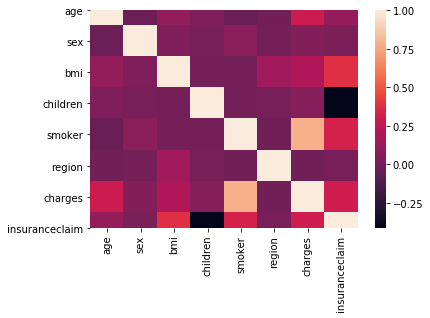

In [15]:
corr = insuranceDF.corr();
print(corr);
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

In [16]:
dfTrain = insuranceDF[:]

In [17]:
trainLabel = np.asarray(dfTrain['insuranceclaim'])
trainData = np.asarray(dfTrain.drop('insuranceclaim',1))

In [18]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
 
trainData = (trainData - means)/stds

In [19]:
insuranceCheck = LogisticRegression(solver="newton-cg")
insuranceCheck.fit(trainData, trainLabel)
y_pred=insuranceCheck.predict(trainData)

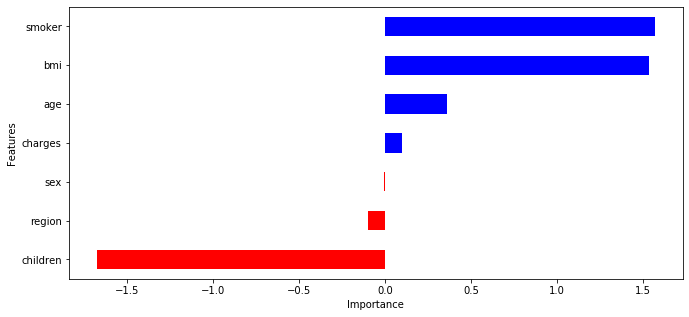

In [20]:
coeff = list(insuranceCheck.coef_[0])
labels = list(dfTrain.drop('insuranceclaim',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 5),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')
plt.show()

In [21]:
accuracy = insuranceCheck.score(trainData, trainLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  88.56502242152466 %


In [11]:
mean_absolute_error(trainLabel,y_pred)

0.11434977578475336